In [2]:
import pandas as pd

# Step 1: Load the dataset
file_path = "1-s2.0-S2352340918309600-mmc5.xlsx"  # Update the path if needed
df = pd.read_excel(file_path)
df


,Jobs_per_ 1Minute,Jobs_per_ 5 Minutes,Jobs_per_ 15Minutes,Mem capacity,Disk_capacity_GB,Num_of_CPU_Cores,CPU_speed_per_Core,Avg_Recieve_Kbps,Avg_Transmit_Kbps,Class_Name
0,7.000,7.455,7.727,12,128.72872,6,1,31.248,31.248,'Very Low'
1,3.600,4.800,5.800,12,128.72872,6,1,31.248,31.248,'Very Low'
2,3.455,4.909,5.818,12,128.72872,6,1,31.248,31.248,'Very Low'
3,4.455,5.273,5.909,12,128.72872,6,1,31.248,31.248,'Very Low'
4,3.500,5.100,5.900,12,128.72872,6,1,31.248,31.248,'Very Low'
...,...,...,...,...,...,...,...,...,...,...
25692,2.563,1.765,0.423,4,732.95900,4,3,181.616,1.025,'Very Low'
25693,3.456,2.438,1.037,4,732.95900,4,3,181.616,1.025,'Very Low'
25694,4.290,3.048,1.026,4,732.95900,4,3,181.616,1.025,'Very Low'
25695,4.483,3.804,1.734,4,732.95900,4,3,181.616,1.025,'Very Low'


In [3]:
# Step 2: Analyze class distribution
print("Class Distribution:")
class_distribution = df['Class_Name'].value_counts()
print(class_distribution)

Class Distribution:
Class_Name
'Very Low'    24082
'Low'          1467
'Medium'        110
'High'           38
Name: count, dtype: int64


In [4]:
# Step 3: Analyze numerical features for basic statistics
print("\nSummary Statistics for Numerical Features:")
numerical_summary = df.describe()
print(numerical_summary)


Summary Statistics for Numerical Features:
       Jobs_per_ 1Minute  Jobs_per_ 5 Minutes  Jobs_per_ 15Minutes  \
count       25697.000000         25697.000000         25697.000000   
mean            9.755389             9.277156             7.823138   
std            14.326339            14.388281            14.740933   
min             0.000000             0.000000             0.000000   
25%             3.610000             3.364000             0.909000   
50%             6.091000             5.455000             3.581000   
75%            11.091000            10.091000             9.100000   
max           522.000000           539.600000           534.600000   

       Mem capacity  Disk_capacity_GB  Num_of_CPU_Cores  CPU_speed_per_Core  \
count  25697.000000      25697.000000      25697.000000        25697.000000   
mean      12.356462        403.400207          5.961863            1.975522   
std       16.325913        342.541727          3.527438            0.999720   
min      

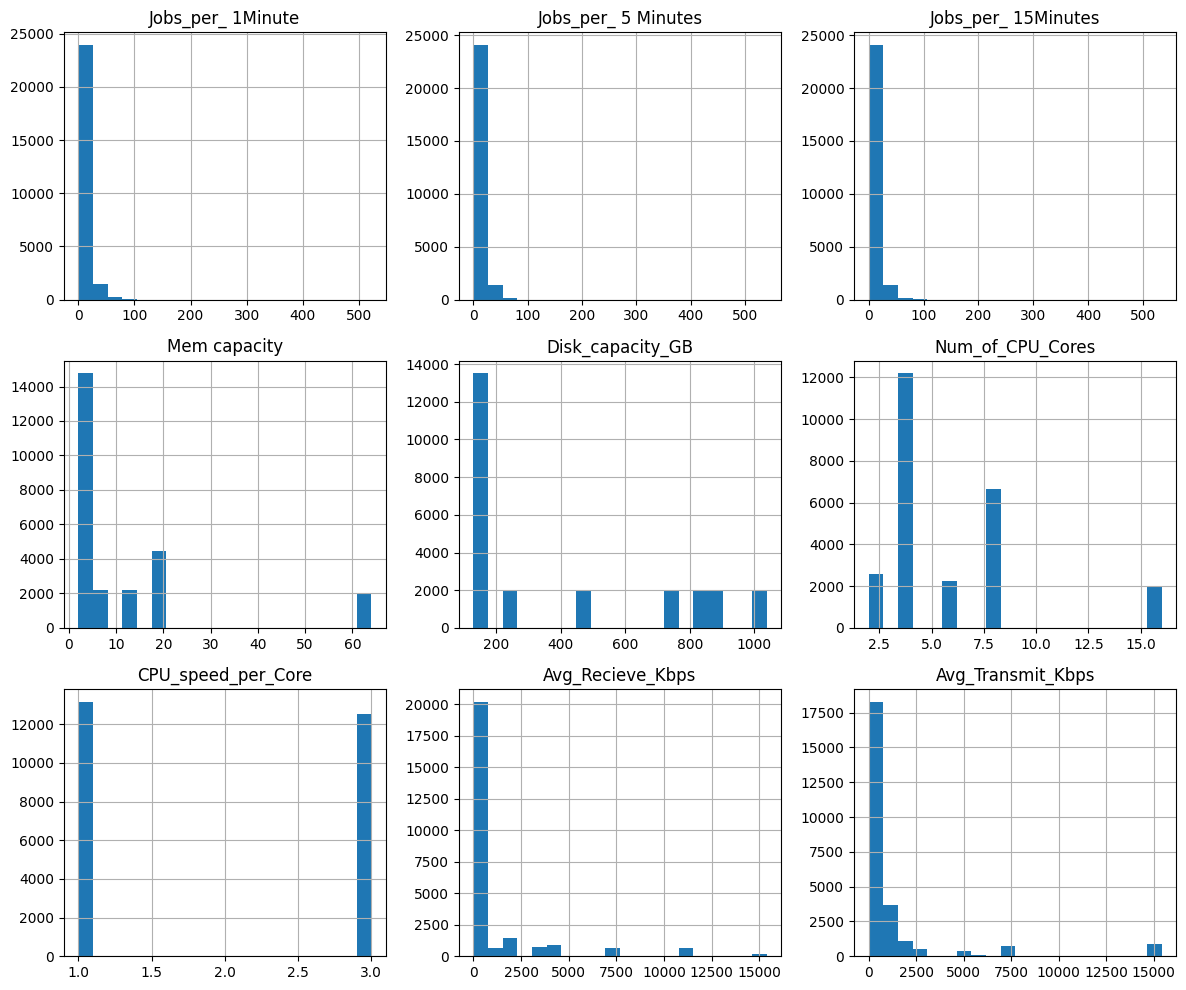

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numerical features
df.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()



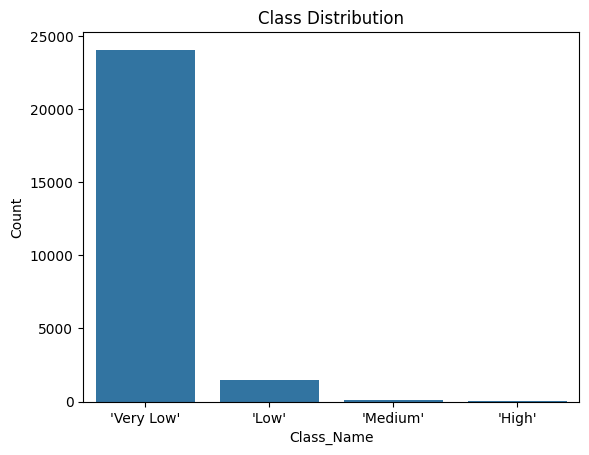

In [6]:
# Bar plot for class distribution
sns.countplot(data=df, x='Class_Name', order=class_distribution.index)
plt.title("Class Distribution")
plt.ylabel("Count")
plt.show()


1. Detect and Treat Outliers

In [7]:
print(df.columns)




Index(['Jobs_per_ 1Minute', 'Jobs_per_ 5 Minutes', 'Jobs_per_ 15Minutes',
       'Mem capacity', 'Disk_capacity_GB', 'Num_of_CPU_Cores',
       'CPU_speed_per_Core', 'Avg_Recieve_Kbps', 'Avg_Transmit_Kbps',
       'Class_Name'],
      dtype='object')


In [8]:
'''# Function to detect and cap outliers using IQR
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
'''
# Updated list of numerical columns
numerical_columns = [
    'Jobs_per_ 1Minute', 'Jobs_per_ 5 Minutes', 'Jobs_per_ 15Minutes',
       'Mem capacity', 'Disk_capacity_GB', 'Num_of_CPU_Cores',
       'CPU_speed_per_Core', 'Avg_Recieve_Kbps', 'Avg_Transmit_Kbps'
]
'''
# Apply outlier treatment
for col in numerical_columns:
    cap_outliers(df, col)
'''
numerical_columns

['Jobs_per_ 1Minute',
 'Jobs_per_ 5 Minutes',
 'Jobs_per_ 15Minutes',
 'Mem capacity',
 'Disk_capacity_GB',
 'Num_of_CPU_Cores',
 'CPU_speed_per_Core',
 'Avg_Recieve_Kbps',
 'Avg_Transmit_Kbps']

2. Normalize Numerical Features

In [9]:

from sklearn.preprocessing import MinMaxScaler

# Initialize scaler
scaler = MinMaxScaler()

# Apply scaling to numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


In [10]:
df

,Jobs_per_ 1Minute,Jobs_per_ 5 Minutes,Jobs_per_ 15Minutes,Mem capacity,Disk_capacity_GB,Num_of_CPU_Cores,CPU_speed_per_Core,Avg_Recieve_Kbps,Avg_Transmit_Kbps,Class_Name
0,0.013410,0.013816,0.014454,0.161290,0.000000,0.285714,0.0,0.001869,0.002020,'Very Low'
1,0.006897,0.008895,0.010849,0.161290,0.000000,0.285714,0.0,0.001869,0.002020,'Very Low'
2,0.006619,0.009097,0.010883,0.161290,0.000000,0.285714,0.0,0.001869,0.002020,'Very Low'
3,0.008534,0.009772,0.011053,0.161290,0.000000,0.285714,0.0,0.001869,0.002020,'Very Low'
4,0.006705,0.009451,0.011036,0.161290,0.000000,0.285714,0.0,0.001869,0.002020,'Very Low'
...,...,...,...,...,...,...,...,...,...,...
25692,0.004910,0.003271,0.000791,0.032258,0.664576,0.142857,1.0,0.011642,0.000062,'Very Low'
25693,0.006621,0.004518,0.001940,0.032258,0.664576,0.142857,1.0,0.011642,0.000062,'Very Low'
25694,0.008218,0.005649,0.001919,0.032258,0.664576,0.142857,1.0,0.011642,0.000062,'Very Low'
25695,0.008588,0.007050,0.003244,0.032258,0.664576,0.142857,1.0,0.011642,0.000062,'Very Low'


In [16]:
df['Class_Name'].value_counts()

,count
Class_Name,
'Very Low',24082
'Low',1467
'Medium',110
'High',38


In [20]:
# Preprocessing: Encoding class labels
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Class_Name'] = label_encoder.fit_transform(df['Class_Name'])
df


,Jobs_per_ 1Minute,Jobs_per_ 5 Minutes,Jobs_per_ 15Minutes,Mem capacity,Disk_capacity_GB,Num_of_CPU_Cores,CPU_speed_per_Core,Avg_Recieve_Kbps,Avg_Transmit_Kbps,Class_Name
0,0.013410,0.013816,0.014454,0.161290,0.000000,0.285714,0.0,0.001869,0.002020,3
1,0.006897,0.008895,0.010849,0.161290,0.000000,0.285714,0.0,0.001869,0.002020,3
2,0.006619,0.009097,0.010883,0.161290,0.000000,0.285714,0.0,0.001869,0.002020,3
3,0.008534,0.009772,0.011053,0.161290,0.000000,0.285714,0.0,0.001869,0.002020,3
4,0.006705,0.009451,0.011036,0.161290,0.000000,0.285714,0.0,0.001869,0.002020,3
...,...,...,...,...,...,...,...,...,...,...
25692,0.004910,0.003271,0.000791,0.032258,0.664576,0.142857,1.0,0.011642,0.000062,3
25693,0.006621,0.004518,0.001940,0.032258,0.664576,0.142857,1.0,0.011642,0.000062,3
25694,0.008218,0.005649,0.001919,0.032258,0.664576,0.142857,1.0,0.011642,0.000062,3
25695,0.008588,0.007050,0.003244,0.032258,0.664576,0.142857,1.0,0.011642,0.000062,3


Split the dataset into training and testing subsets.

In [21]:
from sklearn.model_selection import train_test_split

X = df[numerical_columns]  # Features
y = df['Class_Name']       # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


#SVM

In [22]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
# Import the required function

# Train an SVM with class weights
svm_model = SVC(kernel='linear', class_weight='balanced', random_state=42)
svm_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.64      1.00      0.78         9
           1       0.33      0.67      0.44       344
           2       0.12      0.67      0.21        24
           3       0.99      0.92      0.95      6048

    accuracy                           0.90      6425
   macro avg       0.52      0.81      0.60      6425
weighted avg       0.95      0.90      0.92      6425



In [23]:

df

,Jobs_per_ 1Minute,Jobs_per_ 5 Minutes,Jobs_per_ 15Minutes,Mem capacity,Disk_capacity_GB,Num_of_CPU_Cores,CPU_speed_per_Core,Avg_Recieve_Kbps,Avg_Transmit_Kbps,Class_Name
0,0.013410,0.013816,0.014454,0.161290,0.000000,0.285714,0.0,0.001869,0.002020,3
1,0.006897,0.008895,0.010849,0.161290,0.000000,0.285714,0.0,0.001869,0.002020,3
2,0.006619,0.009097,0.010883,0.161290,0.000000,0.285714,0.0,0.001869,0.002020,3
3,0.008534,0.009772,0.011053,0.161290,0.000000,0.285714,0.0,0.001869,0.002020,3
4,0.006705,0.009451,0.011036,0.161290,0.000000,0.285714,0.0,0.001869,0.002020,3
...,...,...,...,...,...,...,...,...,...,...
25692,0.004910,0.003271,0.000791,0.032258,0.664576,0.142857,1.0,0.011642,0.000062,3
25693,0.006621,0.004518,0.001940,0.032258,0.664576,0.142857,1.0,0.011642,0.000062,3
25694,0.008218,0.005649,0.001919,0.032258,0.664576,0.142857,1.0,0.011642,0.000062,3
25695,0.008588,0.007050,0.003244,0.032258,0.664576,0.142857,1.0,0.011642,0.000062,3


In [24]:
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    mean_absolute_error,
    mean_squared_error
)
'''
from sklearn.preprocessing import LabelEncoder

# Ensure both y_test and y_pred are numerically encoded
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)  # Encode the original y_test
y_pred_encoded = label_encoder.transform(y_pred)      # Encode the predicted values
'''
# Print SVM Results
print("\nSVM Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))



SVM Results:
Accuracy: 0.9017898832684825
Mean Absolute Error (MAE): 0.1778988326848249
Mean Squared Error (MSE): 0.33727626459143967


In [25]:
# Get the total number of rows
total_rows = len(df)

# Calculate 25% of the total rows
training_data_rows = int(0.75 * total_rows)

# Print the result
print(f"Training data: 75% of {total_rows} = {training_data_rows}")


# Calculate 25% of the total rows
testing_data_rows = int(0.25 * total_rows)

# Print the result
print(f"Testing data: 25% of {total_rows} = {testing_data_rows}")


Training data: 75% of 25697 = 19272
Testing data: 25% of 25697 = 6424


In [26]:
# Confusion Matrix for SVM
'''cm_svm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues")


plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
'''
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=encoder.classes_, yticklabels=encoder.classes_)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# SVM model confusion matrix
svm_y_pred = svm_model.predict(X_test)
plot_confusion_matrix(y_test, svm_y_pred, 'SVM')

NameError: name 'encoder' is not defined

<Figure size 800x600 with 0 Axes>

## SVM hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


In [ ]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001],  # Kernel coefficient
    'kernel': ['rbf', 'poly', 'linear']  # Kernel type
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=SVC(class_weight='balanced', random_state=42),
    param_grid=param_grid,
    scoring='f1_macro',  # Macro F1-score for imbalanced data
    cv=5,  # 5-fold cross-validation
    verbose=1,  # Show progress
    n_jobs=-1  # Use all available processors
)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


KeyboardInterrupt: 

In [ ]:

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Predict and evaluate the tuned model
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 48 candidates, totalling 240 fits


KeyboardInterrupt: 

In [ ]:
# Confusion Matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues")


plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Set priors based on class distribution
class_prior = y_train.value_counts(normalize=True)
gnb_model = GaussianNB(priors=class_prior)

# Train and predict
gnb_model.fit(X_train, y_train)
y_pred_naive = gnb_model.predict(X_test)
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.01      1.00      0.02         9
           1       0.09      0.62      0.15       344
           2       0.00      0.00      0.00        24
           3       1.00      0.51      0.68      6048

    accuracy                           0.52      6425
   macro avg       0.27      0.53      0.21      6425
weighted avg       0.95      0.52      0.65      6425



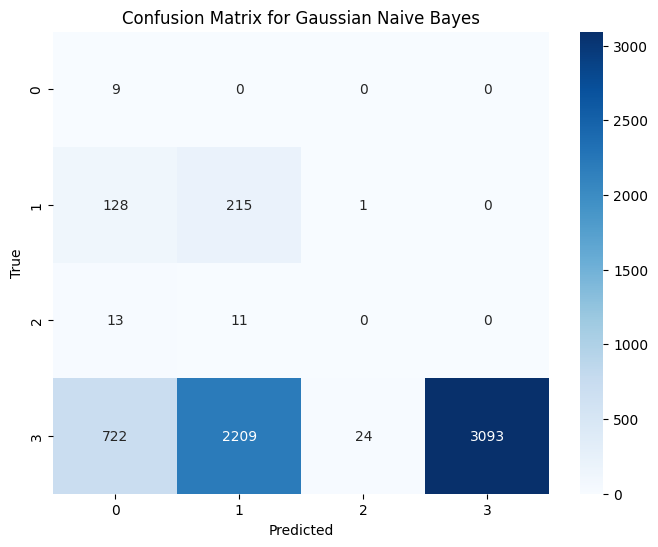

In [ ]:
# Confusion Matrix for SVM
'''cm_naive = confusion_matrix(y_test, y_pred_naive)
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues")


plt.title("Gaussian Naive Bayes Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()'''
# Gaussian Naive Bayes model confusion matrix
gnb_y_pred = gnb_model.predict(X_test)
plot_confusion_matrix(y_test, gnb_y_pred, 'Gaussian Naive Bayes')


# LSTM

In [ ]:
'''from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the new class distribution
print("Class distribution after SMOTE:")
print(y_train_resampled.value_counts())
'''


'from imblearn.over_sampling import SMOTE\n\n# Initialize SMOTE\nsmote = SMOTE(random_state=42)\n\n# Apply SMOTE to training data\nX_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)\n\n# Check the new class distribution\nprint("Class distribution after SMOTE:")\nprint(y_train_resampled.value_counts())\n'

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import Adam

In [ ]:
# Encode target labels and prepare data for LSTM
encoder = LabelEncoder()
#y_train_encoded = to_categorical(encoder.fit_transform(y_train_resampled))
y_train_encoded = to_categorical(encoder.fit_transform(y_train))
y_test_encoded = to_categorical(encoder.transform(y_test))


In [ ]:
# Build LSTM model
model = Sequential([

   # LSTM(64, input_shape=(X_train_resampled.shape[1], 1), activation='relu', return_sequences=True),
    LSTM(64, input_shape=(X_train.shape[1], 1), activation='relu', return_sequences=True),
    LSTM(32, activation='relu'),
    Dense(y_train_encoded.shape[1], activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
print("X_train shape:", X_train.shape)  # Should be (n_samples, n_features)
print("y_train_encoded shape:", y_train_encoded.shape)  # Should be (n_samples, n_classes)


X_train shape: (19272, 9)
y_train_encoded shape: (72136, 4)


In [ ]:
from tensorflow.keras.utils import to_categorical
import numpy as np
# Correct one-hot encoding of y_train
y_train_encoded = to_categorical(y_train, num_classes=len(np.unique(y_train)))

# Check if the shapes are correct now
print("y_train_encoded shape after encoding:", y_train_encoded.shape)  # Should match X_train shape


y_train_encoded shape after encoding: (19272, 4)


In [ ]:
print("X_train shape:", X_train.shape)  # Should be (n_samples, n_features)
print("y_train_encoded shape:", y_train_encoded.shape)  # Should be (n_samples, n_classes)


X_train shape: (19272, 9)
y_train_encoded shape: (19272, 4)


In [ ]:
# Reshape X_train to 3D for LSTM input (samples, time_steps, features)
X_train_reshaped = X_train.values.reshape(-1, X_train.shape[1], 1)
X_test_reshaped = X_test.values.reshape(-1, X_test.shape[1], 1)

# Compile and train the LSTM model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_reshaped, y_train_encoded, epochs=20, batch_size=32)

# Evaluate on the test set
test_loss, test_acc = model.evaluate(X_test_reshaped, y_test_encoded)
print(f"Test Accuracy: {test_acc}")


Epoch 1/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9148 - loss: 0.5079
Epoch 2/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9350 - loss: 0.1989
Epoch 3/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.9498 - loss: 0.1380
Epoch 4/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9512 - loss: 0.1374
Epoch 5/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9529 - loss: 0.1234
Epoch 6/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.9524 - loss: 0.1230
Epoch 7/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.9561 - loss: 0.1174
Epoch 8/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9546 - loss: 0.1189
Epoch 9/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.9552 - loss: 0.1181
Epoch 10/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9562 - loss: 0.1164
Epoch 11/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.9593 - loss: 0.1137
Epoch 12/20
603/603 ━━━━━━━━━━━━━━━━━━

In [ ]:
'''# Compile and train
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#model.fit(X_train_resampled.values.reshape(-1, X_train_resampled.shape[1], 1), y_train_encoded, epochs=20, batch_size=32)
model.fit(X_train.values.reshape(-1, X_train.shape[1], 1), y_train_encoded, epochs=20, batch_size=32)

# Evaluate on the test set
test_loss, test_acc = model.evaluate(X_test.values.reshape(-1, X_test.shape[1], 1), y_test_encoded)
print(f"Test Accuracy: {test_acc}")'''

ValueError: Data cardinality is ambiguous. Make sure all arrays contain the same number of samples.'x' sizes: 19272
'y' sizes: 72136


In [ ]:
# LSTM model evaluation
lstm_y_pred = model.predict(X_test.values.reshape(-1, X_test.shape[1], 1))
lstm_y_pred_classes = encoder.inverse_transform(lstm_y_pred.argmax(axis=1))
print("LSTM Classification Report:")
print(classification_report(y_test, lstm_y_pred_classes))

201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
LSTM Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.89      0.80         9
           1       0.65      0.67      0.66       344
           2       0.17      0.04      0.07        24
           3       0.98      0.98      0.98      6048

    accuracy                           0.96      6425
   macro avg       0.63      0.65      0.63      6425
weighted avg       0.96      0.96      0.96      6425



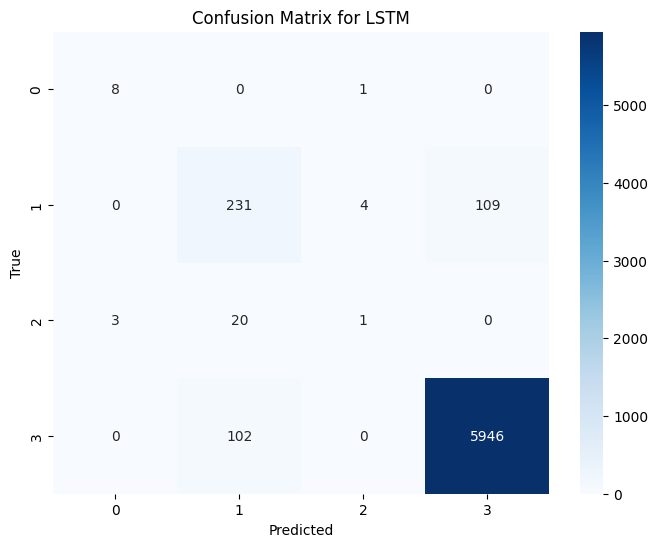

In [ ]:

# LSTM model confusion matrix

plot_confusion_matrix(y_test, lstm_y_pred_classes, 'LSTM')

In [ ]:
# Build a more complex LSTM model with increased units, Dropout, and tanh activation
model_tuned_v2 = Sequential([
    LSTM(128, input_shape=(X_train_resampled.shape[1], 1), activation='tanh', return_sequences=True),
    Dropout(0.3),  # Increased dropout rate
    LSTM(64, activation='tanh'),
    Dropout(0.3),  # Another Dropout layer
    Dense(y_train_encoded.shape[1], activation='softmax')
])

# Compile the model with a different learning rate and try changing the optimizer to RMSprop
optimizer_v2 = Adam(learning_rate=0.0005)  # Lower learning rate for finer optimization

model_tuned_v2.compile(optimizer=optimizer_v2, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with increased epochs and batch size
model_tuned_v2.fit(X_train_resampled.values.reshape(-1, X_train_resampled.shape[1], 1), y_train_encoded, epochs=40, batch_size=32)

# Evaluate on the test set
test_loss, test_acc = model_tuned_v2.evaluate(X_test.values.reshape(-1, X_test.shape[1], 1), y_test_encoded)
print(f"Test Accuracy after further tuning: {test_acc}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


ValueError: Data cardinality is ambiguous. Make sure all arrays contain the same number of samples.'x' sizes: 72136
'y' sizes: 19272


In [ ]:
# LSTM model evaluation
lstm_y_pred = model.predict(X_test.values.reshape(-1, X_test.shape[1], 1))
lstm_y_pred_classes = encoder.inverse_transform(lstm_y_pred.argmax(axis=1))
print("LSTM Classification Report:")
print(classification_report(y_test, lstm_y_pred_classes))

# Evaluation Code for All The 3 Models:

In [ ]:
# SVM model evaluation
svm_y_pred = svm_model.predict(X_test)
print("SVM Classification Report:")
print(classification_report(y_test, svm_y_pred))

# Gaussian Naive Bayes model evaluation
gnb_y_pred = gnb_model.predict(X_test)
print("Gaussian Naive Bayes Classification Report:")
print(classification_report(y_test, gnb_y_pred))

# LSTM model evaluation
lstm_y_pred = model_tuned_v2.predict(X_test.values.reshape(-1, X_test.shape[1], 1))
lstm_y_pred_classes = encoder.inverse_transform(lstm_y_pred.argmax(axis=1))
print("LSTM Classification Report:")
print(classification_report(y_test, lstm_y_pred_classes))

SVM Classification Report:
              precision    recall  f1-score   support

      'High'       0.64      1.00      0.78         9
       'Low'       0.33      0.67      0.44       344
    'Medium'       0.12      0.67      0.21        24
  'Very Low'       0.99      0.92      0.95      6048

    accuracy                           0.90      6425
   macro avg       0.52      0.81      0.60      6425
weighted avg       0.95      0.90      0.92      6425

Gaussian Naive Bayes Classification Report:
              precision    recall  f1-score   support

      'High'       0.01      1.00      0.02         9
       'Low'       0.09      0.62      0.15       344
    'Medium'       0.00      0.00      0.00        24
  'Very Low'       1.00      0.51      0.68      6048

    accuracy                           0.52      6425
   macro avg       0.27      0.53      0.21      6425
weighted avg       0.95      0.52      0.65      6425



NameError: name 'model_tuned_v2' is not defined

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=encoder.classes_, yticklabels=encoder.classes_)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# SVM model confusion matrix
svm_y_pred = svm_model.predict(X_test)
plot_confusion_matrix(y_test, svm_y_pred, 'SVM')



NameError: name 'encoder' is not defined

<Figure size 800x600 with 0 Axes>

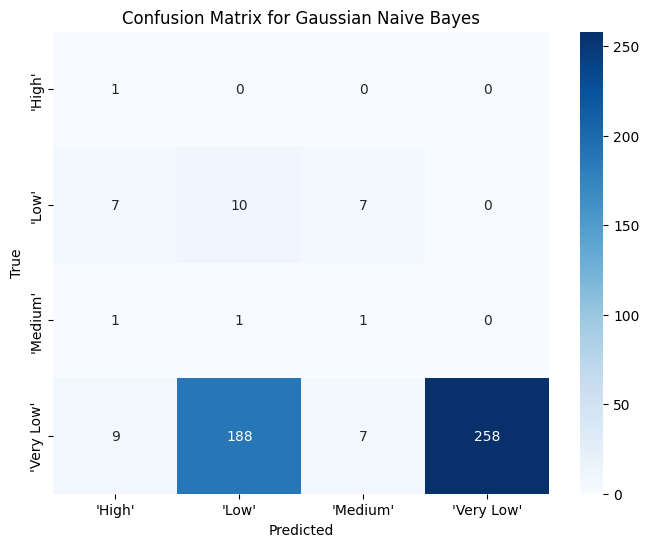

In [ ]:
# Gaussian Naive Bayes model confusion matrix
gnb_y_pred = gnb_model.predict(X_test)
plot_confusion_matrix(y_test, gnb_y_pred, 'Gaussian Naive Bayes')


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


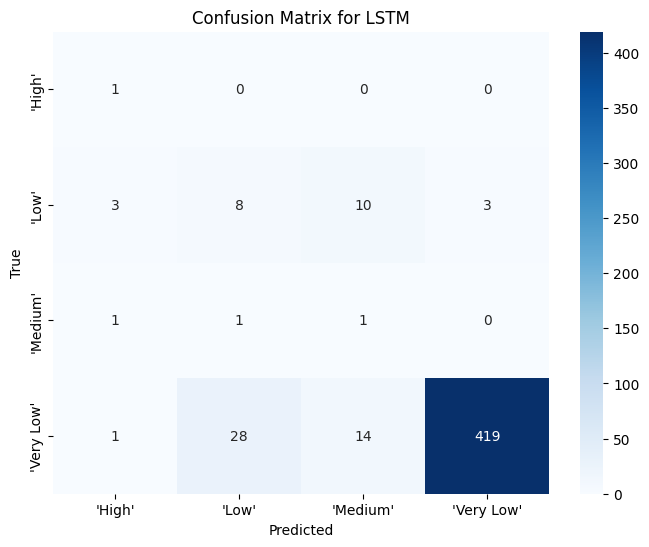

In [ ]:

# LSTM model confusion matrix
lstm_y_pred = model_tuned_v2.predict(X_test.values.reshape(-1, X_test.shape[1], 1))
lstm_y_pred_classes = encoder.inverse_transform(lstm_y_pred.argmax(axis=1))
plot_confusion_matrix(y_test, lstm_y_pred_classes, 'LSTM')